In [1]:
import numpy as np
import pandas as pd
import g20_functions as g20

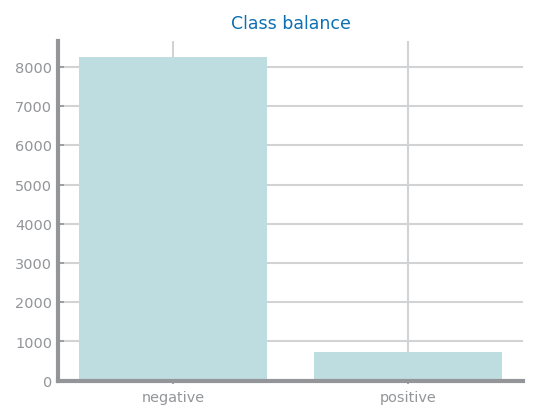

Minority class: 741
Majority class: 8251
Proportion: 0.09 : 1


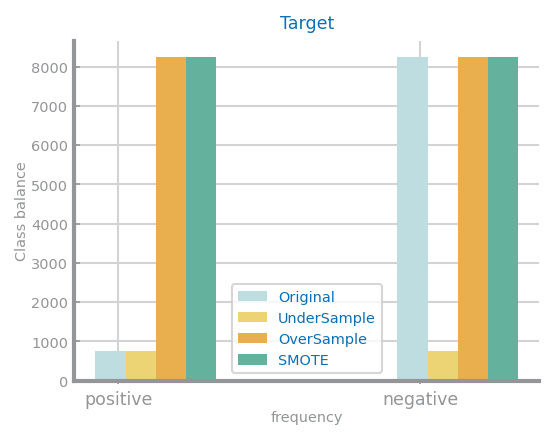

In [ ]:
# KNN uses 200-best features
values = g20.outlierRemovalData(g20.fs_k_best(g20.balanceData(g20.loadToxic(), dataset='Toxic')['OverSample'],
                                              dataset='Toxic')['k=200'], dataset='Toxic')

In [ ]:
import g20_KNN
for k, v in values.items():
    X, y, labels = g20.xySplit(v, target=1024)
    g20_KNN.holdoutKNN(X, y, labels, "Toxic_"+k)

In [ ]:
# NB, DT and RF use 300-best features
values = g20.outlierRemovalData(g20.fs_k_best(g20.balanceData(g20.loadToxic(), dataset='Toxic')['OverSample'],
                                              dataset='Toxic')['k=300'], dataset='Toxic')

In [ ]:
from g20_Naive_Bayes import holdoutNaiveBayes
for k, v in values.items():
    X, y, labels = g20.xySplit(v, target=1024)
    holdoutNaiveBayes(X, y, labels, "Toxic_"+k)

In [ ]:
from g20_Decision_Trees import holdoutDT
for k, v in values.items():
    X, y, labels = g20.xySplit(v, target=1024)
    holdoutDT(X, y, labels, "Toxic_"+k)

In [ ]:
from g20_Random_Forests import crossValRF
for k, v in values.items():
    X, y, labels = g20.xySplit(v, target=1024)
    crossValRF(X, y, labels, "Toxic_"+k)

In [ ]:
from g20_Gradient_Boosting import holdoutGB
for k, v in values.items():
    X, y, labels = g20.xySplit(v, target=1024)
    holdoutGB(X, y, labels, "Toxic_"+k,
              learn_rates=[0.01, 0.1, 0.5],
              n_estimators = [100, 200, 300],
              max_depths=[5, 10, 25], max_features=[.5, 1])